In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

In [30]:
os.listdir()

['seeds.csv',
 'seeds-width-vs-length.csv',
 'Seeds Clustering.ipynb',
 '.ipynb_checkpoints']

In [31]:
samples = pd.read_csv('seeds.csv', header = None)
seeds_w_l = pd.read_csv('seeds-width-vs-length.csv', header = None)

In [32]:
display(samples.head())
display(seeds_w_l.head())

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [33]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
0    210 non-null float64
1    210 non-null float64
2    210 non-null float64
3    210 non-null float64
4    210 non-null float64
5    210 non-null float64
6    210 non-null float64
7    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [34]:
print(samples.shape)
print(seeds_w_l.shape)

(210, 8)
(210, 2)


In [35]:
samples[7].unique()

array([1, 2, 3])

In [36]:
#samples[7] = samples[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat' })
#samples.rename(columns = {7: 'varieties'})

In [48]:
varieties = []

for i in samples[7]:
    if i == 1:
        i = 'Kama wheat'
    elif i == 2:
        i = 'Rosa wheat'
    else:
        i = 'Canadian wheat'
    #varieties.append[i]
    varieties.append(i)


## How many clusters of grain?


In [38]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(samples)
    inertias.append(model.inertia_)

inertias

[2859.852410177952,
 1147.2480596008331,
 625.7199966009624,
 512.3364264634379,
 429.2136848796426]

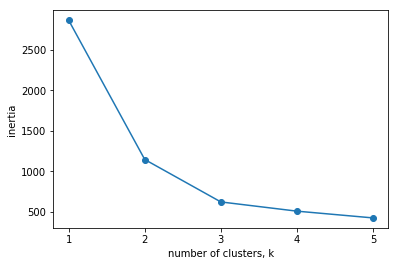

In [39]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

good number of clusters is 3

## Evaluating the grain clustering


In [40]:
model = KMeans (n_clusters = 3)
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)
type(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0          64          10
1                       0           1          60
2                      70           5           0


pandas.core.frame.DataFrame

The clustering seem to be okay/good

## Dendrogram

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

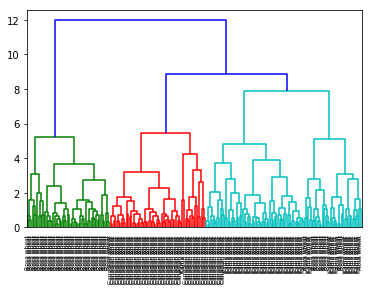

In [51]:
mergings = linkage(samples, method = 'complete')
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

## Extracting Cluster Labels

use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulatio

In [52]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion = 'distance')

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          52
2                      58           2           0
3                      12          50           0
4                       0          18          18


## t-SNE visualization of grain dataset


In [53]:
variety_numbers = [1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

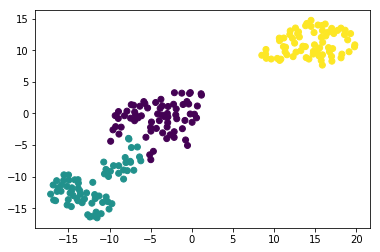

In [57]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 200)
tsne_features = model.fit_transform(samples)
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]
plt.scatter(xs, ys, c=variety_numbers)